In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
%matplotlib inline

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


height has been deprecated.



In [4]:
data = pd.read_excel("fatigue.xlsx")
data.drop(['Sl. No.'],axis=1, inplace=True)
# data.corr()

In [5]:
feature = data.columns[:-1]
target = data.columns[-1]
X = data[feature]
y = data[target]

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
pca = PCA(n_components=2, random_state=1)
principal_components = pca.fit_transform(X)

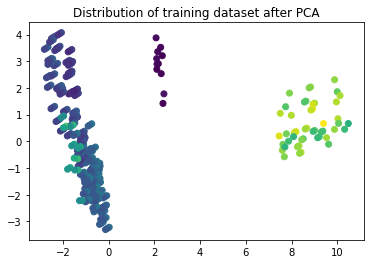

In [7]:
plt.scatter(principal_components[:,0],principal_components[:,1], c = y)
plt.title("Distribution of training dataset after PCA")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Linear Regression

In [10]:
linreg = LinearRegression().fit(X_train,y_train)
linregression = linreg.score(X,y)
LTerror = mean_squared_error(y_train, linreg.predict(X_train))/len(y_train)
print("Linear Regression Training data:", LTerror)

Linear Regression Training data: 2.797190204648535


In [11]:
Y_pred_1 = linreg.predict(X_test)
linerror = mean_squared_error(y_test, Y_pred_1)/len(y_test)
print("Linear Regression Test data:", linerror)

Linear Regression Test data: 11.944859123755878


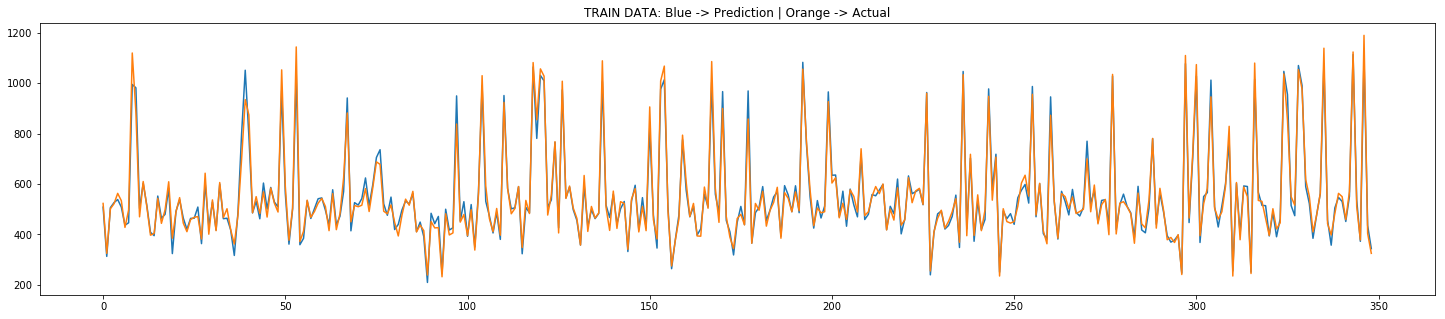

In [12]:
train_pred_1 = linreg.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_1)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

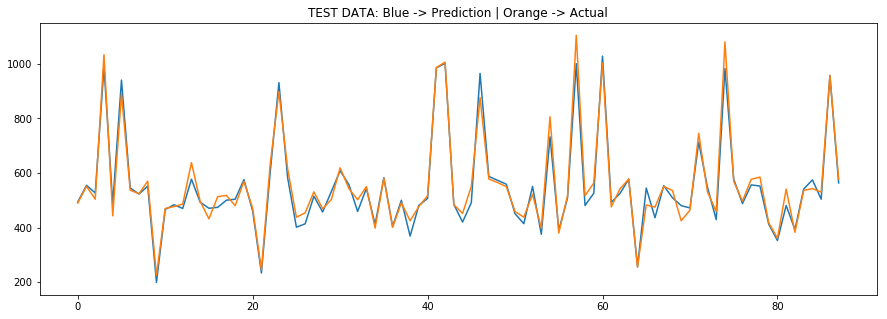

In [13]:
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_1)
plt.plot(range(88), y_test)
plt.title('TEST DATA: Blue -> Prediction | Orange -> Actual')

## Neural Network

In [14]:
model = Sequential()
model.add(Dense(output_dim=200, input_dim=25, activation='sigmoid'))
model.add(Dense(output_dim=1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=25, activation="sigmoid", units=200)`
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
model.compile(loss='mean_squared_error', optimizer='sgd')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [16]:
print('Training -----------')
for step in range(1001):
    cost = model.train_on_batch(X_train, y_train)
    if step % 100 == 0:
        print('train cost: ', cost/len(X_train))

Training -----------
train cost:  975.9314111747851
train cost:  19.945954680784386
train cost:  11.559716517057664
train cost:  7.686441590929442
train cost:  5.642274173419592
train cost:  4.509868108099033
train cost:  3.5303486384088467
train cost:  3.1274508500850646
train cost:  2.706012015356375
train cost:  2.458685145337124
train cost:  2.2106176338086496


In [17]:
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=10)
print('\nTest cost:', cost/len(X_test))
W, b = model.layers[0].get_weights()
# print('Weights=', W, '\nbiases=', b)


Testing ------------
10/88 [==>...........................] - ETA: 0s
Test cost: 13.69224936114855


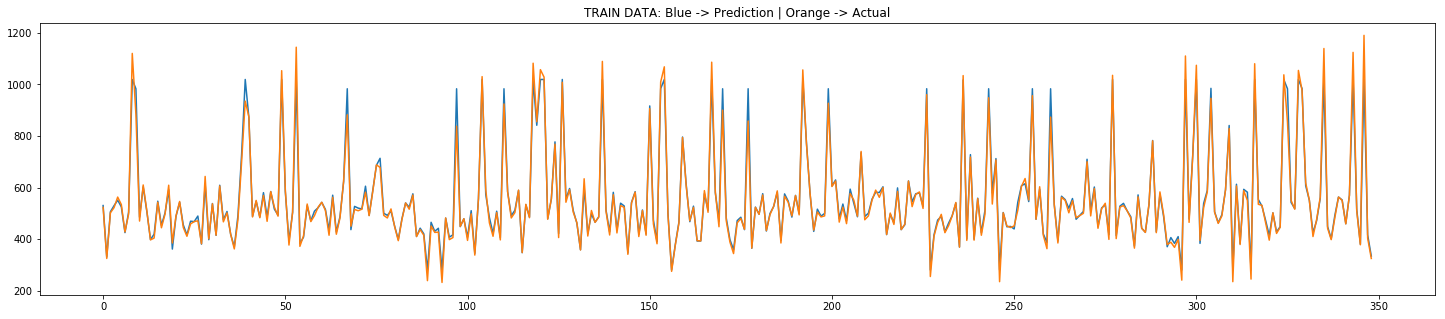

In [18]:
train_pred_2 = model.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_2)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

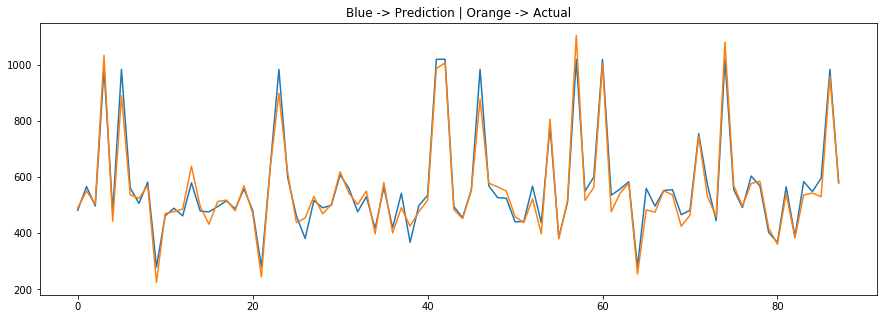

In [19]:
Y_pred_2 = model.predict(X_test)
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_2)
plt.plot(range(88), y_test)
plt.title('Blue -> Prediction | Orange -> Actual')
plt.show()

## SVM regressor

In [21]:
svreg = SVR(kernel='sigmoid', verbose=1, C=15)
svreg.fit(X_train, y_train)
SVRtrain = mean_squared_error(y_train, svreg.predict(X_train))/len(y_train)
print("\nSVM Regressor Train data:", SVRtrain)

[LibSVM]
SVM Regressor Train data: 31.08707255908299


In [22]:
Y_pred_3 = svreg.predict(X_test)
SVRerror = mean_squared_error(y_test, Y_pred_3)/len(y_train)
print("SVM Regressor Test data:", SVRerror)

SVM Regressor Test data: 37.885126996369216


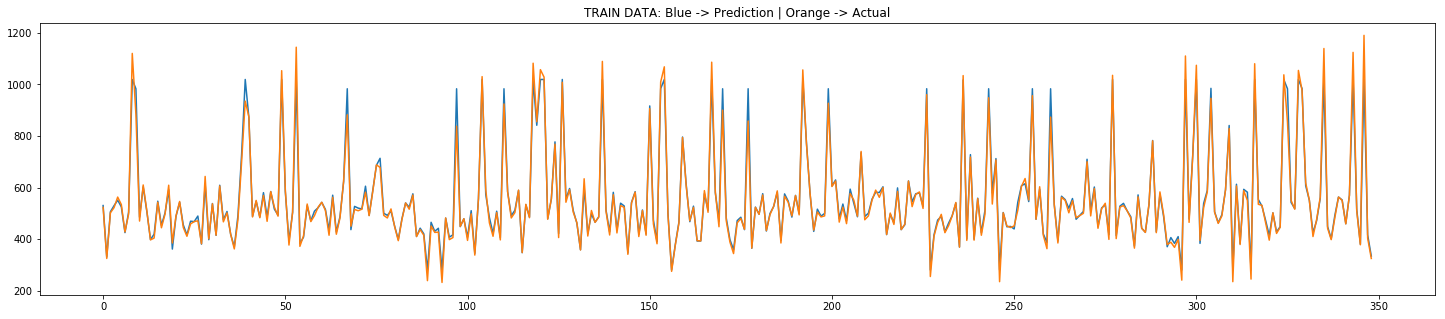

In [23]:
train_pred_3 = model.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_3)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

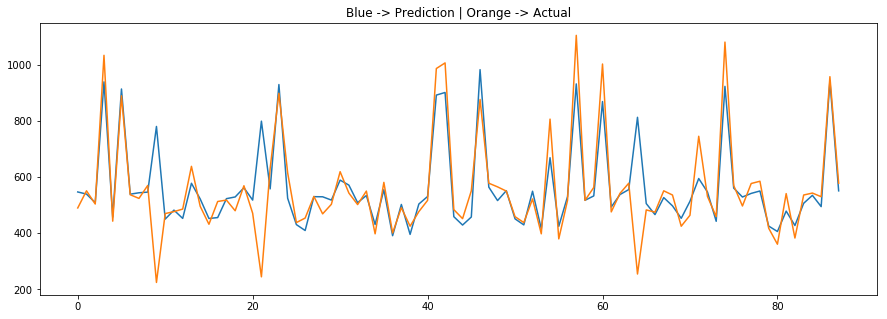

In [24]:
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_3)
plt.plot(range(88), y_test)
plt.title('Blue -> Prediction | Orange -> Actual')
plt.show()

## Decision Tree Regressor

In [25]:
dtregr = DecisionTreeRegressor(max_depth=6, random_state=1)
dtregr.fit(X_train, y_train)
DTRtrain = mean_squared_error(y_train, dtregr.predict(X_train))/len(y_train)
print("Decision Tree Train data:", DTRtrain)

Decision Tree Train data: 1.3039723012470723


In [26]:
Y_pred_4 = dtregr.predict(X_test)
DTRerror = mean_squared_error(y_test, Y_pred_4)/len(y_train)
print("Decision Tree Test data:", DTRerror)

Decision Tree Test data: 3.5882939915833716


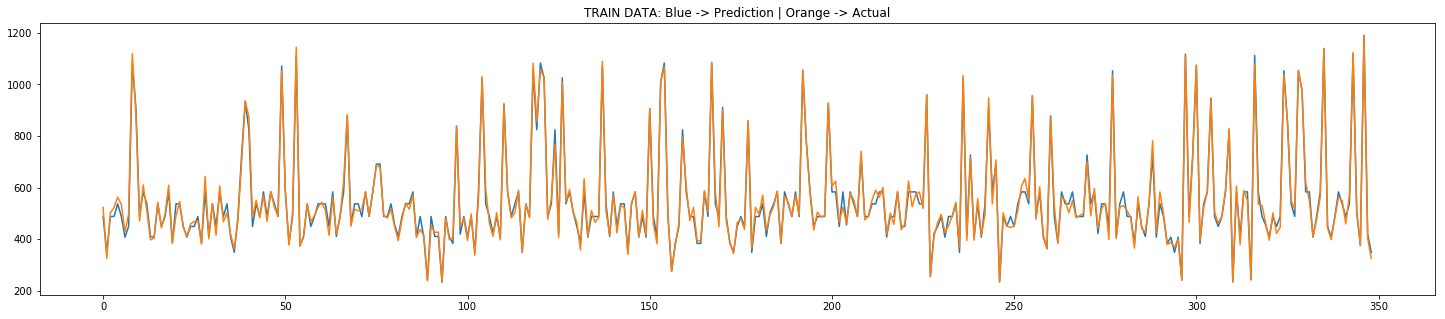

In [27]:
train_pred_4 = dtregr.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_4)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

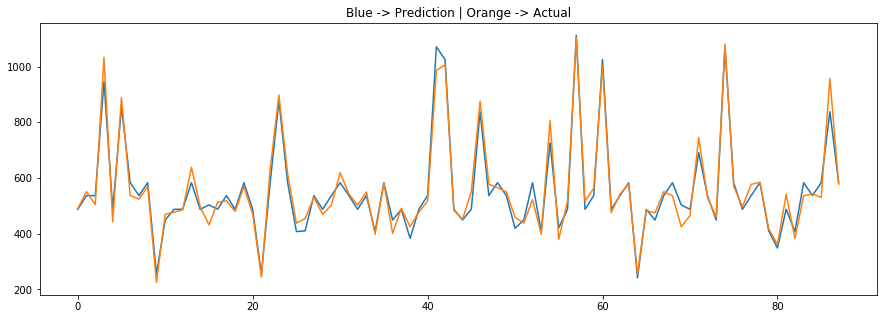

In [28]:
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_4)
plt.plot(range(88), y_test)
plt.title('Blue -> Prediction | Orange -> Actual')
plt.show()

## RandomForestRegressor

In [29]:
rfregr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=6, verbose=True, random_state=1, oob_score=True)
rfregr.fit(X_train, y_train)
rfrtrain = mean_squared_error(y_train, rfregr.predict(X_train))/len(y_train)
print("Random Forest Train data:", rfrtrain)

Random Forest Train data: 1.0264301174951893


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [30]:
Y_pred_5 = rfregr.predict(X_test)
RFRerror = mean_squared_error(y_test, Y_pred_5)/len(y_train)
print("Random Forest Test data:", RFRerror)

Random Forest Test data: 2.5202220376227205


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


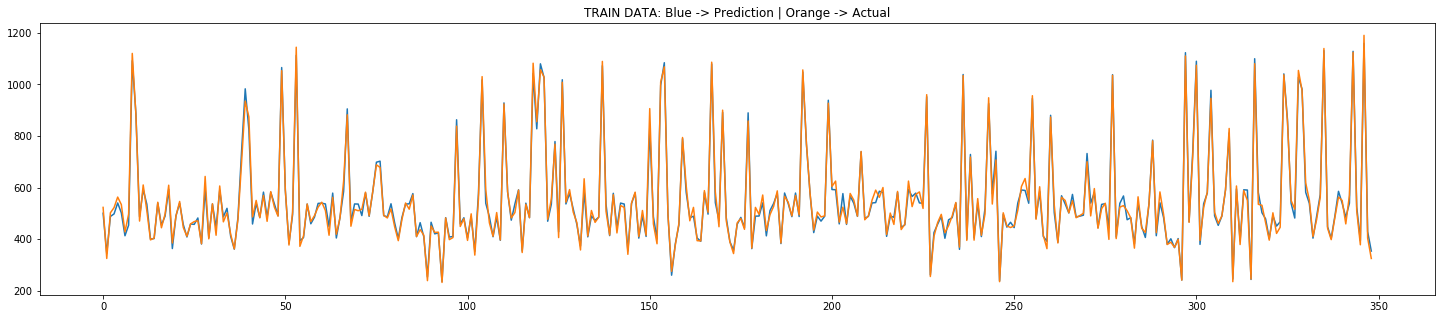

In [31]:
train_pred_5 = rfregr.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_5)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

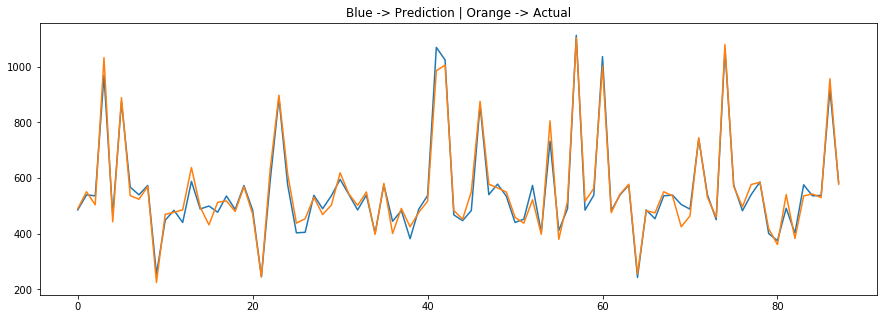

In [32]:
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_5)
plt.plot(range(88), y_test)
plt.title('Blue -> Prediction | Orange -> Actual')
plt.show()

## XGBoost Regressor

In [34]:
xgbregr = XGBRegressor(n_estimators=100, learning_rate=0.15, gamma=0, max_depth=7)
xgbregr.fit(X_train, y_train)
XGBtrain = mean_squared_error(y_train, xgbregr.predict(X_train))/len(y_train)
print("XGBoost Regressor Train data:", XGBtrain)

XGBoost Regressor Train data: 0.006333664689721697


In [35]:
Y_pred_6 = xgbregr.predict(X_test)
XGBerror = mean_squared_error(y_test, Y_pred_6)/len(y_train)
print("XGBoost Regressor Test data:", XGBerror)

XGBoost Regressor Test data: 1.774232494914776


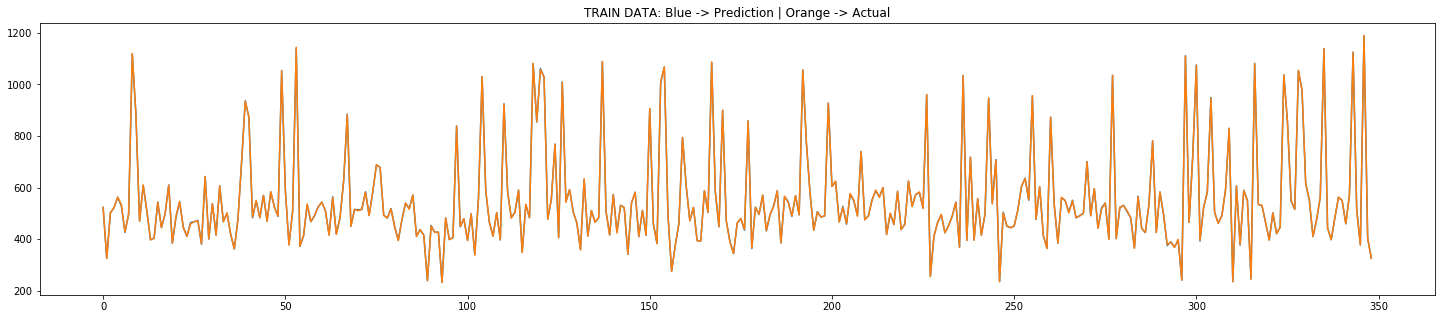

In [36]:
train_pred_6 = xgbregr.predict(X_train)
plt.figure(figsize=(25,5))
plt.plot(range(349), train_pred_6)
plt.plot(range(349), y_train)
plt.title('TRAIN DATA: Blue -> Prediction | Orange -> Actual')

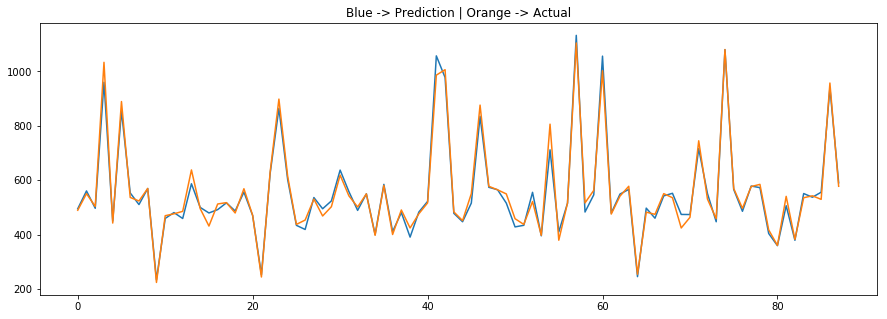

In [37]:
plt.figure(figsize=(15,5))
plt.plot(range(88), Y_pred_6)
plt.plot(range(88), y_test)
plt.title('Blue -> Prediction | Orange -> Actual')
plt.show()